# Bank personal loan conversion case study

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget

In [ ]:
# Library import statements

In [165]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [166]:
#load data into pandas object
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [167]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [168]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Attribute Information:
     ID           : Customer ID                                                                           
     Age         : Customer's age in completed years 
     Experience  : #years of professional experience   
     Income   : Annual income of the customer ($000)  
     ZIP Code  : Home Address ZIP code. 
     Family   : Family size of the customer
     CCAvg  : Avg. spending on credit cards per month ($000) 
   Education  : Education Level.1: Undergrad; 2: Graduate;    3: Advanced/Professional  
     Mortgage  : Value of house mortgage if any. ($000) 
     Personal Loan  : Did this customer accept the personal loan offered in the last campaign? 
     Securities Account : Does the customer have a securities account with the bank? 
     CD Account  : Does the customer have a certificate of deposit (CD)    account with the bank?  
     Online   : Does the customer use internet banking facilities?  
   Credit card  : Does the customer use a credit card issued by  UniversalBank?  

In [98]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [169]:
# Null value check
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [100]:
# Observation on given data
# Dataset has 5000`columns and min experience shows negative need to clean dataset

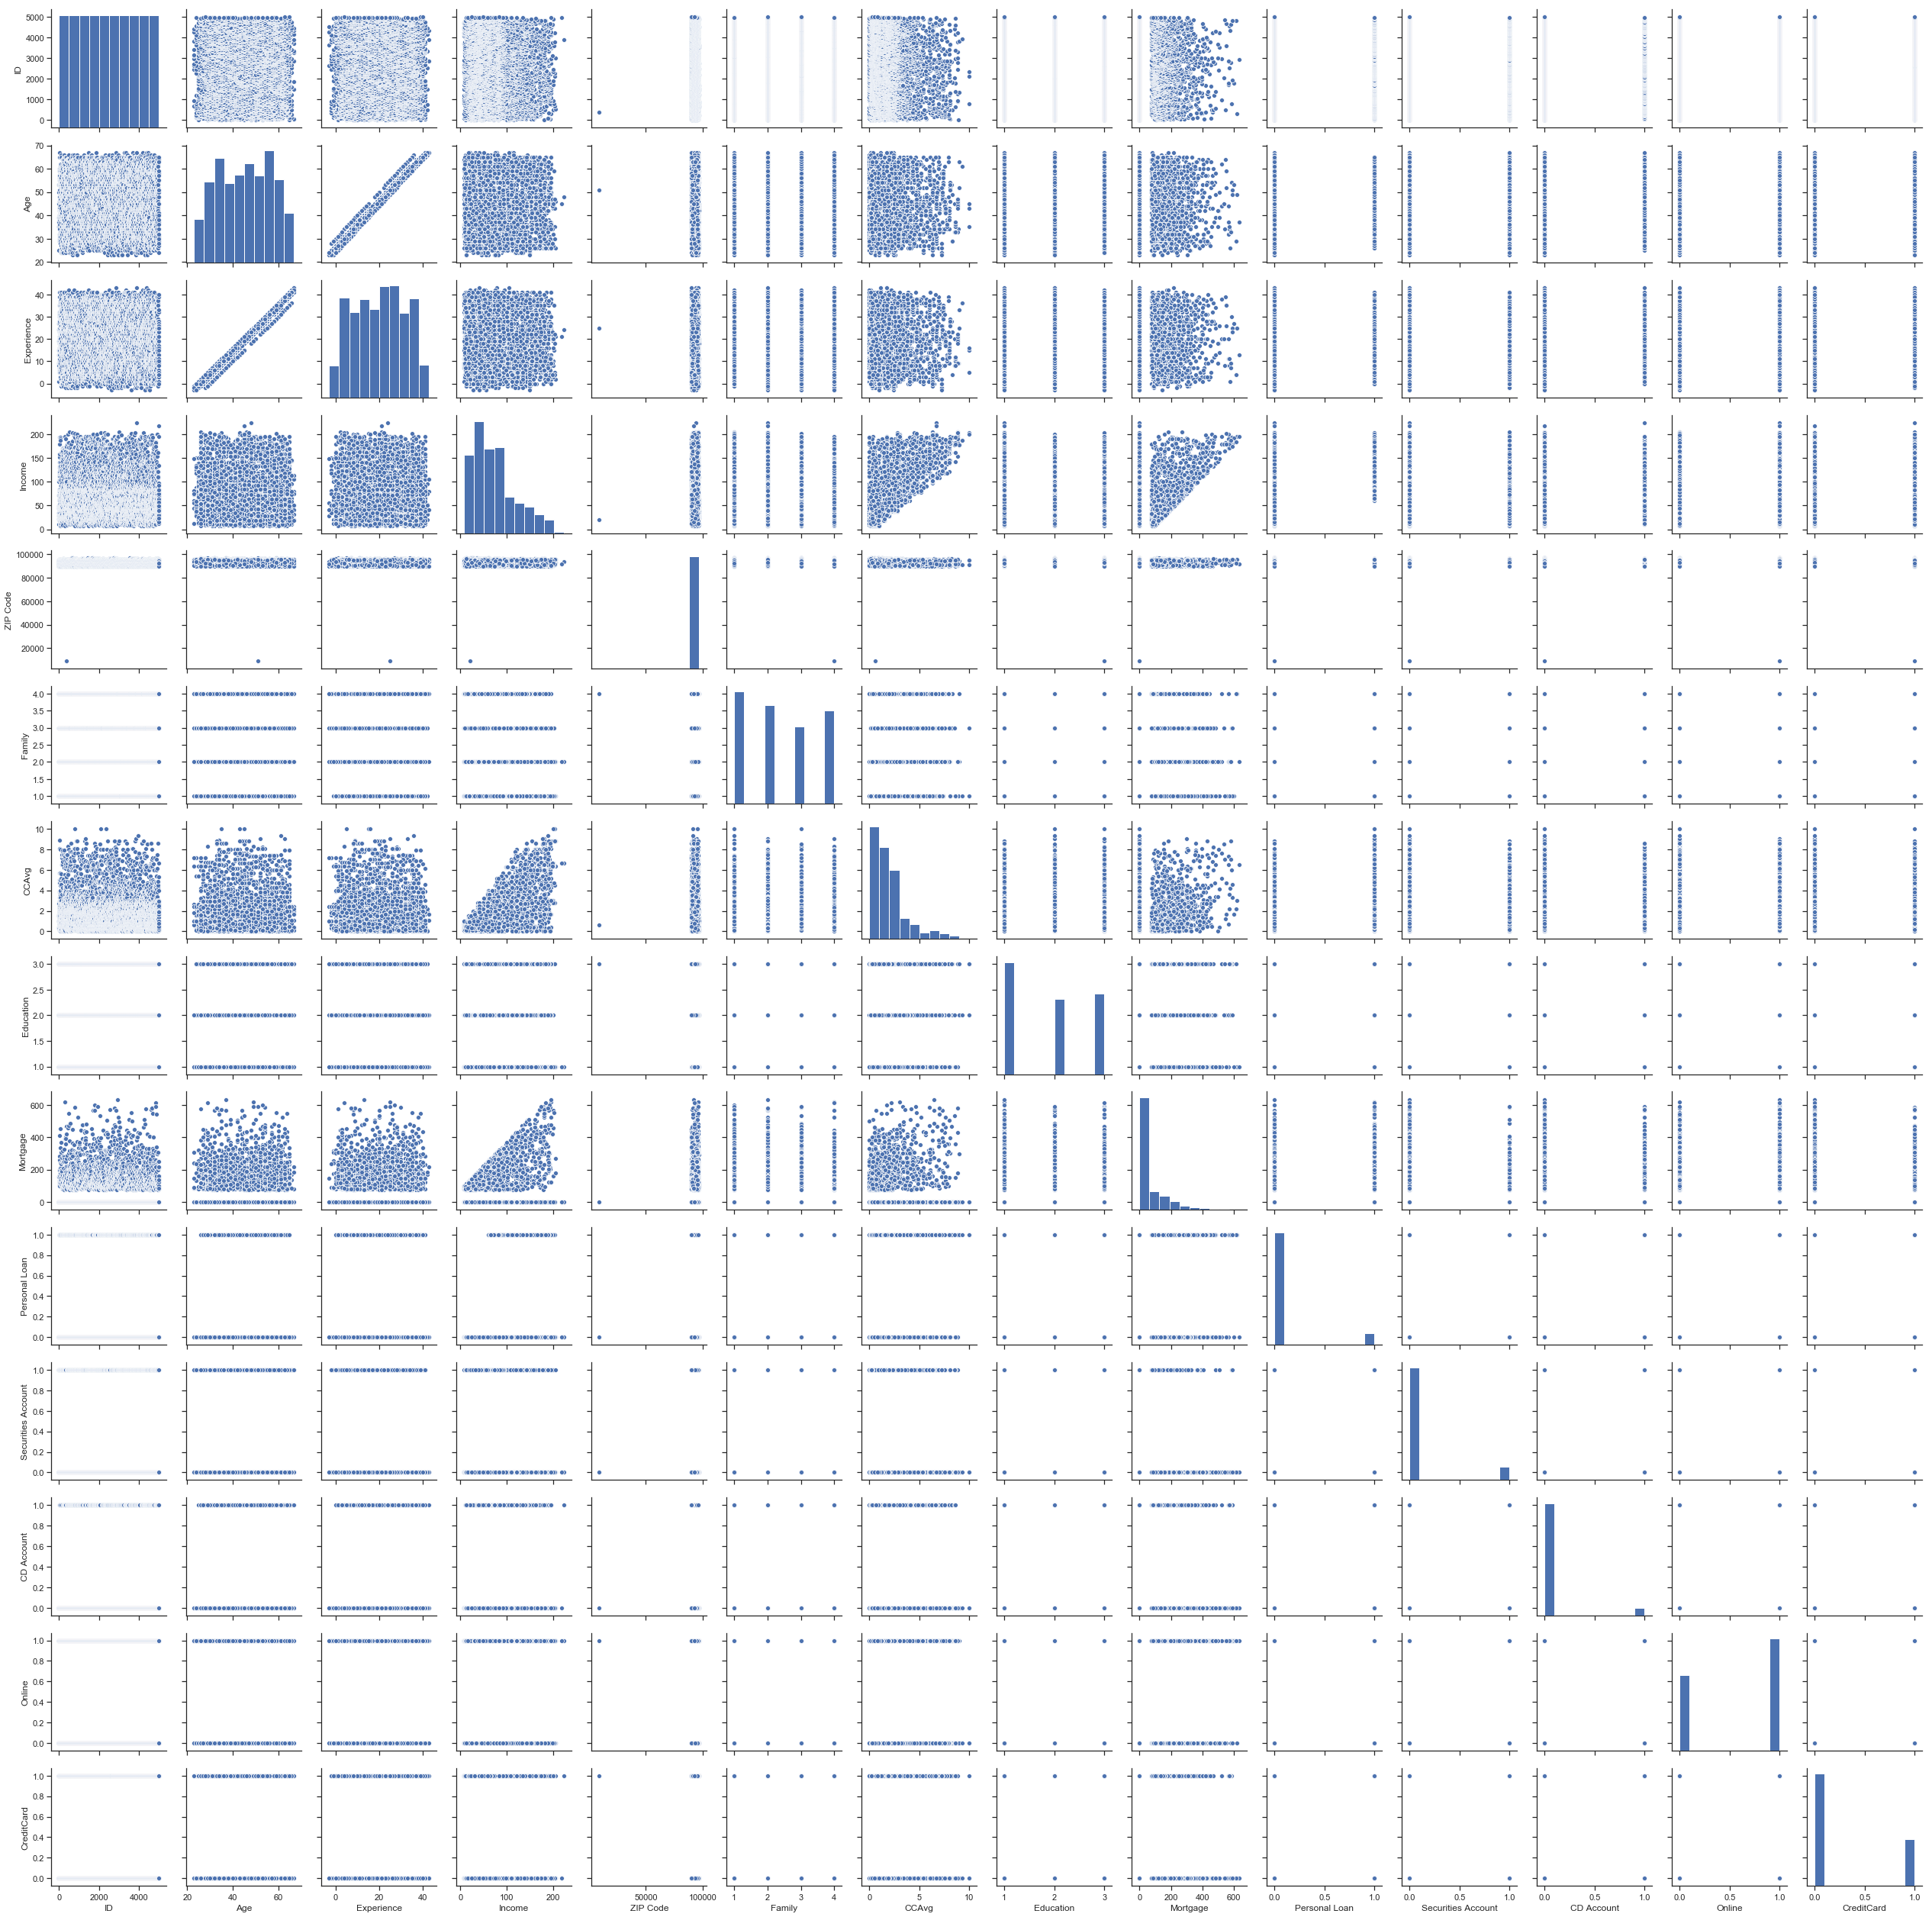

In [170]:
plt = sns.pairplot(df)
plt

# observations


Age-->Normally distributed
Experience--->Normally distributed(Negative values and more normally distributed towards experience >7 years
Income---> Skewed positively (mostly customers are in between income 45 to 55) mean> median
CCAvg is also a positively skewed variable (avg spending is between 0 to 10 and majority spends less than 2.5)

In [171]:
#clean the negative variable
dfExp = df.loc[df['Experience'] >0]
negExp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [172]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [173]:
df.describe()
#Min experience value 0

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# sns.boxplot(x="Education",y="Income",hue="Personal Loan",data=df)

### Observation 
Education level one have higher income than higher levels.
personal loan customers have the same income distribution irrespective of education levels.

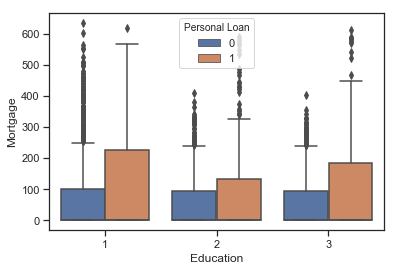

In [106]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

In [174]:

### Observation 
#customers  who have loan having higher mortgage than no loan customers

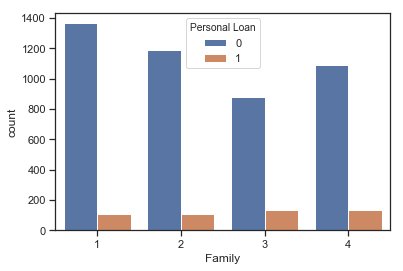

In [108]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

# Observation 
#customer family size  have less impact on loan part.Almost same distribution

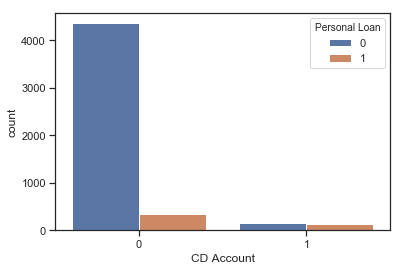

In [110]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

# Observation
No cd account No loans.Customers who doent have cd accont doesnt have any loan.

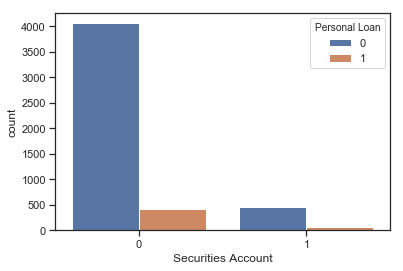

In [112]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

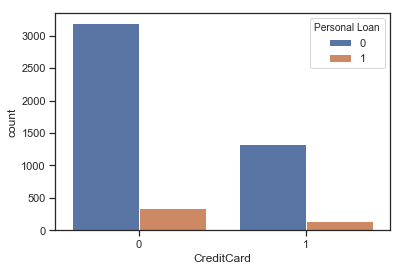

In [113]:
sns.countplot(x="CreditCard", data=df,hue="Personal Loan")

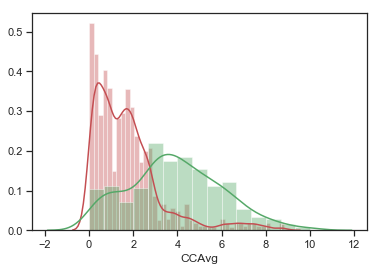

In [114]:
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')

# Observation
customer who have loan have higher credit average than other group

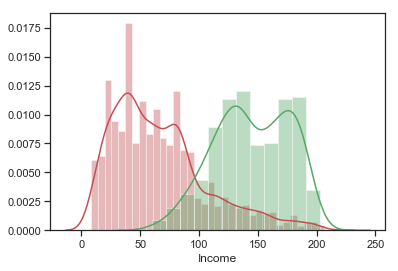

In [116]:
sns.distplot( df[df['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( df[df['Personal Loan'] == 1]['Income'], color = 'g')

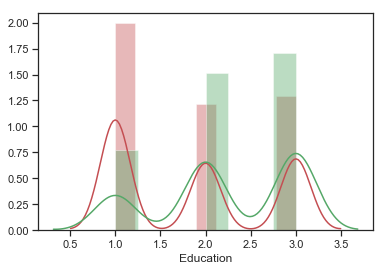

In [117]:
sns.distplot( df[df['Personal Loan']== 0]['Education'], color = 'r')
sns.distplot( df[df['Personal Loan']== 1]['Education'], color = 'g')

# Observation 
correlated
age nd experience
income and cc avg


# Training and Test data spliting

In [119]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3)

In [120]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [121]:
train_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.254857,73.256857,93168.212571,2.403429,1.883714,56.494571,0.103714,0.058857,0.592000,0.306000
std,11.477660,45.317482,2256.234848,1.150613,0.839452,100.901768,0.304933,0.235391,0.491533,0.460896
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91942.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,94609.000000,3.000000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
test_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,45.533333,74.981333,93115.847333,2.380000,1.874667,56.508667,0.10600,0.064000,0.608000,0.266000
std,11.430719,47.656721,1769.187755,1.140965,0.841088,103.617809,0.30794,0.244835,0.488359,0.442012
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,36.000000,39.000000,91798.500000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93109.000000,2.000000,2.000000,0.000000,0.00000,0.000000,1.000000,0.000000
75%,55.000000,101.000000,94606.000000,3.000000,3.000000,100.250000,0.00000,0.000000,1.000000,1.000000
max,67.000000,218.000000,96651.000000,4.000000,3.000000,589.000000,1.00000,1.000000,1.000000,1.000000


# KNeighborsClassifier

In [123]:
train_set_indep = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [124]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [125]:
print(acc)

0.9446297531687792


In [163]:
confusion_matr = pd.DataFrame(confusion_matrix(Y_Test, predicted).T, index=['No', 'Yes'], columns=['No', 'Yes'])
confusion_matr.index.name = 'Predicted'
confusion_matr.columns.name = 'True'
confusion_matr

True,No,Yes
Predicted,,
No,1366,76
Yes,7,50


# Naive Bayes

In [128]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.9026666666666666

In [157]:

confusion_matr = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
confusion_matr.index.name = 'Predicted'
confusion_matr.columns.name = 'True'
confusion_matr



True,No,Yes
Predicted,,
No,1272,75
Yes,71,82


In [133]:
#create an instance and fit the model 
import warnings #To ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
logmodel = LogisticRegression()
logmodel.fit(X_Train, Y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [134]:
#predictions
Predictions = logmodel.predict(X_Test)

In [160]:
confusion_matr = pd.DataFrame(confusion_matrix(Y_Test, Predictions).T, index=['No', 'Yes'], columns=['No', 'Yes'])
confusion_matr.index.name = 'Predicted'
confusion_matr.columns.name = 'True'
confusion_matr


True,No,Yes
Predicted,,
No,1351,49
Yes,22,77


In [132]:
accuracy_score(Y_Test,Predictions)

0.95263509006004

In [135]:

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [152]:
predicted_decisiontree = dt_model.predict(test_set)

In [153]:
dt_model.score(test_set , test_labels)

0.98

RandomForestClassifier

In [138]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

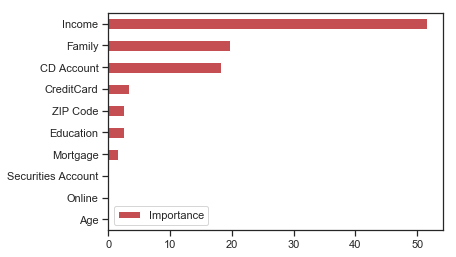

In [139]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [140]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.928

In [161]:
confusion_matr = pd.DataFrame(confusion_matrix(test_labels, predicted_random).T, index=['No', 'Yes'], columns=['No', 'Yes'])
confusion_matr.index.name = 'Predicted'
confusion_matr.columns.name = 'True'
confusion_matr


True,No,Yes
Predicted,,
No,1343,108
Yes,0,49


# Model comparison

# Accuracy score of 
Logistic Regression--->0.952
  KNN-->0.944
  Navie bias--->0.902
   Random classifier--->0.928
   Decision tree-->0.98


# The classification goal is to predict the likelihood of a liability customer buying personal loans. From the above accuracy Scores it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our finest model but (Out of KNN and Naive ,Logistic regression we can go for Logistic regression)